<a href="https://colab.research.google.com/github/ImagingDataCommons/idc-radiomics-reproducibility/blob/main/notebooks/results_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ImagingDataCommons/idc-radiomics-reproducibility.git idc-radiomics-reproducibility

REPO_PATH="/content/idc-radiomics-reproducibility/src"
DATA_PATH="/content/idc-radiomics-reproducibility/data"

Cloning into 'idc-radiomics-reproducibility'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 62 (delta 14), reused 33 (delta 8), pack-reused 18
Unpacking objects: 100% (62/62), 61.24 MiB | 2.05 MiB/s, done.


In [2]:
%%capture
!pip install lifelines

In [3]:
import os
import sys
sys.path.append(REPO_PATH)

import numpy as np
import pandas as pd

from sklearn import metrics

from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter

from IPython.display import clear_output

# ----------------------------------------

#everything that has to do with plotting goes here below

import matplotlib
matplotlib.use('agg')

import matplotlib.pyplot as plt

%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
%config InlineBackend.figure_format = 'png'

plt.rcParams['figure.dpi'] = 300

## ----------------------------------------

import seaborn as sns

In [4]:
# analysis baseline: Hosny et Al. results
baseline_csv_name = 'nsclc-radiomics_hosny_baseline.csv'
baseline_csv_path = os.path.join(DATA_PATH, baseline_csv_name)
baseline_df = pd.read_csv(baseline_csv_path)

# list of the NSCLC-Radiomics subjects analysed in Hosny et Al.
baseline_subj_list = sorted([a for a in list(baseline_df["id"].dropna())])

In [5]:
baseline_subj_list[:5]

['LUNG1-002', 'LUNG1-003', 'LUNG1-004', 'LUNG1-005', 'LUNG1-006']

In [6]:
display(baseline_df.info())
display(baseline_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Columns: 1017 entries, id to squareroot_glszm_SizeZoneNonUniformityNormalized
dtypes: float64(1008), int64(1), object(8)
memory usage: 1.6+ MB


None

,id,surv2yr,logit_0,logit_1,general_info_BoundingBox,general_info_GeneralSettings,general_info_ImageHash,general_info_ImageSpacing,general_info_InputImages,general_info_MaskHash,...,squareroot_glrlm_LongRunHighGrayLevelEmphasis,squareroot_glrlm_RunPercentage,squareroot_glrlm_LongRunLowGrayLevelEmphasis,squareroot_glrlm_RunEntropy,squareroot_glrlm_HighGrayLevelRunEmphasis,squareroot_glrlm_RunLengthNonUniformityNormalized,squareroot_glszm_GrayLevelVariance,squareroot_glszm_SmallAreaHighGrayLevelEmphasis,squareroot_glszm_GrayLevelNonUniformityNormalized,squareroot_glszm_SizeZoneNonUniformityNormalized
0,LUNG1-002,0,0.968347,0.031653,"(6, 6, 5, 32, 32, 26)","{'distances': [1], 'additionalInfo': True, 'en...",a577b1b7d4375b9033fdda06aedf5d57a357725d,"(0.9770000000000001, 0.9770000000000001, 1.0)","{'Logarithm': {}, 'Square': {}, 'LoG': {}, 'Ex...",acbeafb30d4025a34a9440ab239954e10ed7ecd0,...,3125.021178,0.897218,0.004137,5.371893,2156.126099,0.820418,275.485496,1206.671878,0.021989,0.567945
1,LUNG1-003,0,0.958545,0.041455,"(6, 5, 6, 14, 21, 16)","{'distances': [1], 'additionalInfo': True, 'en...",80c517262c15e91714d2b68bc382183c5b37f2eb,"(0.9770000000000001, 0.9770000000000001, 1.0)","{'Logarithm': {}, 'Square': {}, 'LoG': {}, 'Ex...",3b77f3b3276adbf3ef9a2349570a69963bad2904,...,2917.664614,0.911738,0.018233,5.630110,2060.416208,0.857786,434.694760,767.679911,0.026017,0.326410
2,LUNG1-004,0,0.966061,0.033939,"(5, 5, 6, 17, 23, 35)","{'distances': [1], 'additionalInfo': True, 'en...",e20a402cf62f481dc190b62e20f6d514805b904c,"(0.9765624999999998, 0.9765624999999998, 2.999...","{'Logarithm': {}, 'Square': {}, 'LoG': {}, 'Ex...",3eb541b1683488a784e3287b9cb35b5609e06456,...,1565.688979,0.944076,0.002404,5.211423,1275.933449,0.897489,108.771689,811.938282,0.030057,0.529306
3,LUNG1-005,0,0.922006,0.077994,"(6, 6, 5, 17, 26, 23)","{'distances': [1], 'additionalInfo': True, 'en...",3fa57bbe79c711b41029f73373478f3fb844f117,"(0.9770000000000001, 0.9770000000000001, 1.0)","{'Logarithm': {}, 'Square': {}, 'LoG': {}, 'Ex...",5b79d37b692d00b039ba447d5ac7ba38ff2cebf4,...,4162.812549,0.937182,0.001449,5.300661,3345.457240,0.884061,286.408921,2070.346753,0.026143,0.560653
4,LUNG1-006,0,0.898475,0.101525,"(6, 6, 5, 21, 22, 23)","{'distances': [1], 'additionalInfo': True, 'en...",9ed1f78f9ae3ae61b0b983eb1dce4982e2b645a2,"(0.9770000000000001, 0.9770000000000001, 1.0)","{'Logarithm': {}, 'Square': {}, 'LoG': {}, 'Ex...",51f63a6a38c2fbf51f6d7b87b9421cc93752573d,...,1997.930692,0.932777,0.013044,5.704314,1501.008054,0.878849,290.847603,659.287678,0.021000,0.410438


---

In [7]:
# analysis baseline: Hosny et Al. results
reproduced_csv_name = 'nsclc-radiomics_reproducibility.csv'
reproduced_csv_path = os.path.join(DATA_PATH, reproduced_csv_name)
reproduced_df = pd.read_csv(reproduced_csv_path)

# list of the NSCLC-Radiomics subjects analysed in Hosny et Al.
reproduced_subj_list = sorted([a for a in list(reproduced_df["PatientID"].dropna())])

In [8]:
reproduced_subj_list[:5]

['LUNG1-002', 'LUNG1-003', 'LUNG1-004', 'LUNG1-005', 'LUNG1-006']

In [9]:
display(reproduced_df.info())
display(reproduced_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               206 non-null    object 
 1   CNN_output_argmax       206 non-null    int64  
 2   CNN_logit0              206 non-null    float64
 3   baseline_logit0         206 non-null    float64
 4   baseline_output_argmax  206 non-null    int64  
 5   surv2yr                 206 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 9.8+ KB


None

,PatientID,CNN_output_argmax,CNN_logit0,baseline_logit0,baseline_output_argmax,surv2yr
0,LUNG1-226,0,0.965940,0.966019,0,0
1,LUNG1-196,0,0.967094,0.968133,0,0
2,LUNG1-007,0,0.951402,0.951439,0,0
3,LUNG1-053,0,0.978494,0.975959,0,0
4,LUNG1-329,0,0.952828,0.954214,0,0


# Clinical Data

In the future, parse the clinical data from IDC directly.

For the complete tutorial on this topic, please see [this notebook](https://github.com/ImagingDataCommons/IDC-Tutorials/blob/master/notebooks/clinical_data_intro.ipynb).

In [10]:
# analysis baseline: Hosny et Al. results
clinical_csv_name = 'nsclc-radiomics_clinical.csv'
clinical_csv_path = os.path.join(DATA_PATH, clinical_csv_name)
clinical_df = pd.read_csv(clinical_csv_path)

# list of the NSCLC-Radiomics subjects analysed in Hosny et Al.
clinical_subj_list = sorted([a for a in list(clinical_df["PatientID"].dropna())])

In [11]:
clinical_subj_list[:5]

['LUNG1-001', 'LUNG1-002', 'LUNG1-003', 'LUNG1-004', 'LUNG1-005']

In [12]:
display(clinical_df.info())
display(clinical_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         422 non-null    object 
 1   age               400 non-null    float64
 2   clinical.T.Stage  421 non-null    float64
 3   Clinical.N.Stage  422 non-null    int64  
 4   Clinical.M.Stage  422 non-null    int64  
 5   Overall.Stage     421 non-null    object 
 6   Histology         380 non-null    object 
 7   gender            422 non-null    object 
 8   Survival.time     422 non-null    int64  
 9   deadstatus.event  422 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 33.1+ KB


None

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event
0,LUNG1-001,78.7515,2.0,3,0,IIIb,large cell,male,2165,1
1,LUNG1-002,83.8001,2.0,0,0,I,squamous cell carcinoma,male,155,1
2,LUNG1-003,68.1807,2.0,3,0,IIIb,large cell,male,256,1
3,LUNG1-004,70.8802,2.0,1,0,II,squamous cell carcinoma,male,141,1
4,LUNG1-005,80.4819,4.0,2,0,IIIb,squamous cell carcinoma,male,353,1


Join the clinical data DataFrame with the one from the previous notebook (reproduced analysis).

In [13]:
results_df = reproduced_df.merge(clinical_df, on="PatientID")

Prepare the dataset for analysis. In this case, we split in two groups based on the median of the risk score computed on the Radboud dataset (as described in Figure 3 of the paper). 

The tables storing the results from Hosny et Al. pipeline are available at the model's repository: https://github.com/modelhub-ai/deep-prognosis

In [14]:
# analysis baseline: Hosny et Al. results
radboud_csv_name = 'Radboud.csv'
radboud_csv_path = os.path.join(DATA_PATH, radboud_csv_name)
radboud_df = pd.read_csv(radboud_csv_path)

median_threshold = np.median(radboud_df["logit_0"].values)
print("Median risk score (tuning set):", median_threshold)

Median risk score (tuning set): 0.9721243980000001


In [15]:
display(radboud_df.info())
display(radboud_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Columns: 1017 entries, id to squareroot_glszm_SizeZoneNonUniformityNormalized
dtypes: float64(1003), int64(7), object(7)
memory usage: 826.4+ KB


None

,id,surv2yr,logit_0,logit_1,general_info_BoundingBox,general_info_GeneralSettings,general_info_ImageHash,general_info_ImageSpacing,general_info_InputImages,general_info_MaskHash,...,squareroot_glrlm_LongRunHighGrayLevelEmphasis,squareroot_glrlm_RunPercentage,squareroot_glrlm_LongRunLowGrayLevelEmphasis,squareroot_glrlm_RunEntropy,squareroot_glrlm_HighGrayLevelRunEmphasis,squareroot_glrlm_RunLengthNonUniformityNormalized,squareroot_glszm_GrayLevelVariance,squareroot_glszm_SmallAreaHighGrayLevelEmphasis,squareroot_glszm_GrayLevelNonUniformityNormalized,squareroot_glszm_SizeZoneNonUniformityNormalized
0,1,1,0.972305,0.027695,"(6, 6, 6, 22, 34, 44)","{'distances': [1], 'additionalInfo': True, 'en...",64f8af1b632c3e70e1a18c6cea4511460c144f7a,"(0.9375000000000002, 0.9375000000000002, 3.000...","{'Logarithm': {}, 'Square': {}, 'LoG': {}, 'Ex...",8aa0aeaa92796c9ff22fa5ea1bc6b61eed95ec87,...,2323.752800,0.940274,0.004625,6.103566,1910.133777,0.890533,336.867711,1377.036254,0.017220,0.547338
1,2,0,0.971212,0.028788,"(5, 6, 6, 19, 17, 22)","{'distances': [1], 'additionalInfo': True, 'en...",0eefbff6e59086d08d2e33645cce7176796415b2,"(0.938, 0.938, 3.0000000000000004)","{'Logarithm': {}, 'Square': {}, 'LoG': {}, 'Ex...",98ac405e25e4aa5bffbaaac7dbb3353e7e85ca3c,...,3742.924076,0.920038,0.001426,5.129774,2835.656431,0.857379,227.132898,1788.648910,0.032198,0.552180
2,3,0,0.981770,0.018230,"(5, 6, 6, 28, 20, 38)","{'distances': [1], 'additionalInfo': True, 'en...",8b4fa36459848ff1de375603318847faea538ce3,"(1.171875, 1.171875, 3.0000000000000004)","{'Logarithm': {}, 'Square': {}, 'LoG': {}, 'Ex...",5a806e226d20f6ed5026a921759962416a310638,...,3191.134744,0.906179,0.001969,4.950641,2258.532856,0.836061,119.286715,1366.679626,0.037030,0.526933
3,4,1,0.968498,0.031502,"(5, 5, 6, 16, 40, 28)","{'distances': [1], 'additionalInfo': True, 'en...",c2c5bcf455d4938749a88052b5721535cd2e4ff9,"(0.938, 0.938, 3.0000000000000004)","{'Logarithm': {}, 'Square': {}, 'LoG': {}, 'Ex...",759d6c7528f5658d902725ca9170c23f5b6c262b,...,1265.503811,0.941865,0.005972,5.577417,1001.534604,0.894120,131.002331,612.175538,0.025303,0.510327
4,5,0,0.966816,0.033184,"(5, 6, 6, 27, 21, 24)","{'distances': [1], 'additionalInfo': True, 'en...",a11ed8a281575513699093b01a381fb89f32601b,"(0.9765624999999998, 0.9765624999999998, 2.999...","{'Logarithm': {}, 'Square': {}, 'LoG': {}, 'Ex...",0fb636fa1179d9a828eb554ff596f443d581cf83,...,2802.467279,0.946026,0.003685,5.751348,2282.561603,0.899590,299.243538,1394.740730,0.019646,0.571747


In [16]:
results_df["group_baseline"]="≤ median"
results_df["group_baseline_cat"]=0

results_df["group_reproduced"]="≤ median"
results_df["group_reproduced_cat"]=0

results_df.loc[results_df['baseline_logit0']>median_threshold, 'group_baseline']="> median"
results_df.loc[results_df['baseline_logit0']>median_threshold, 'group_baseline_cat']=1

results_df.loc[results_df['CNN_logit0']>median_threshold, 'group_reproduced']="> median"
results_df.loc[results_df['CNN_logit0']>median_threshold, 'group_reproduced_cat']=1

In [35]:
# 5-years follow-up - closer to the original analisys (results are almost identical)
results_df["Survival.time_5y"] = results_df["Survival.time"]
results_df["deadstatus.event_5y"] = results_df["deadstatus.event"]

# if the patient died AFTER five years, set the "deadstatus.event" variable AT 5 years to 0
results_df.loc[(results_df['Survival.time']>365.25*5) & \
               (results_df['deadstatus.event']==1), 'deadstatus.event_5y']=0

# cap "Survival.time_5y" to five years when it exceeds five years
results_df.loc[results_df['Survival.time']>365.25*5,  'Survival.time_5y']=np.floor(365.25*5).astype(int)

---

# AUROC Analisys (2 years survival)

In [17]:
sns.set_style("ticks")
sns.set_context(rc={"grid.linewidth": .5})

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [18]:
def style_axis_auc(ax):

  ax.set_xlim([0, 1])
  ax.set_ylim([0, 1])
  ax.set_xlabel('FPR')
  ax.set_ylabel('TPR')
  ax.grid(linewidth = .25)
  ax.plot([0, 1], [0, 1], 'k--', linewidth=.75)

  ax.tick_params(width = .75)
  for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(.75)
      
  sns.despine()

  return ax

In [19]:
y_true = np.stack(results_df["surv2yr"].values)
y_pred_baseline = 1 - np.stack(results_df["baseline_logit0"].values)
y_pred_reproduction = 1 - np.stack(results_df["CNN_logit0"].values)

baseline = dict()
reproduction = dict()


baseline["fpr"], baseline["tpr"], baseline["thr_roc"] = metrics.roc_curve(y_true, y_pred_baseline)
baseline["prc"], baseline["rec"], baseline["thr_pr"] = metrics.precision_recall_curve(y_true, y_pred_baseline)

reproduction["fpr"], reproduction["tpr"], reproduction["thr_roc"] = metrics.roc_curve(y_true, y_pred_reproduction)
reproduction["prc"], reproduction["rec"], reproduction["thr_pr"] = metrics.precision_recall_curve(y_true, y_pred_reproduction)


baseline["roc_auc"] = metrics.auc(baseline["fpr"], baseline["tpr"])
baseline["pr_auc"] = metrics.auc(baseline["rec"], baseline["prc"])

reproduction["roc_auc"] = metrics.auc(reproduction["fpr"], reproduction["tpr"])
reproduction["pr_auc"] = metrics.auc(reproduction["rec"], reproduction["prc"])

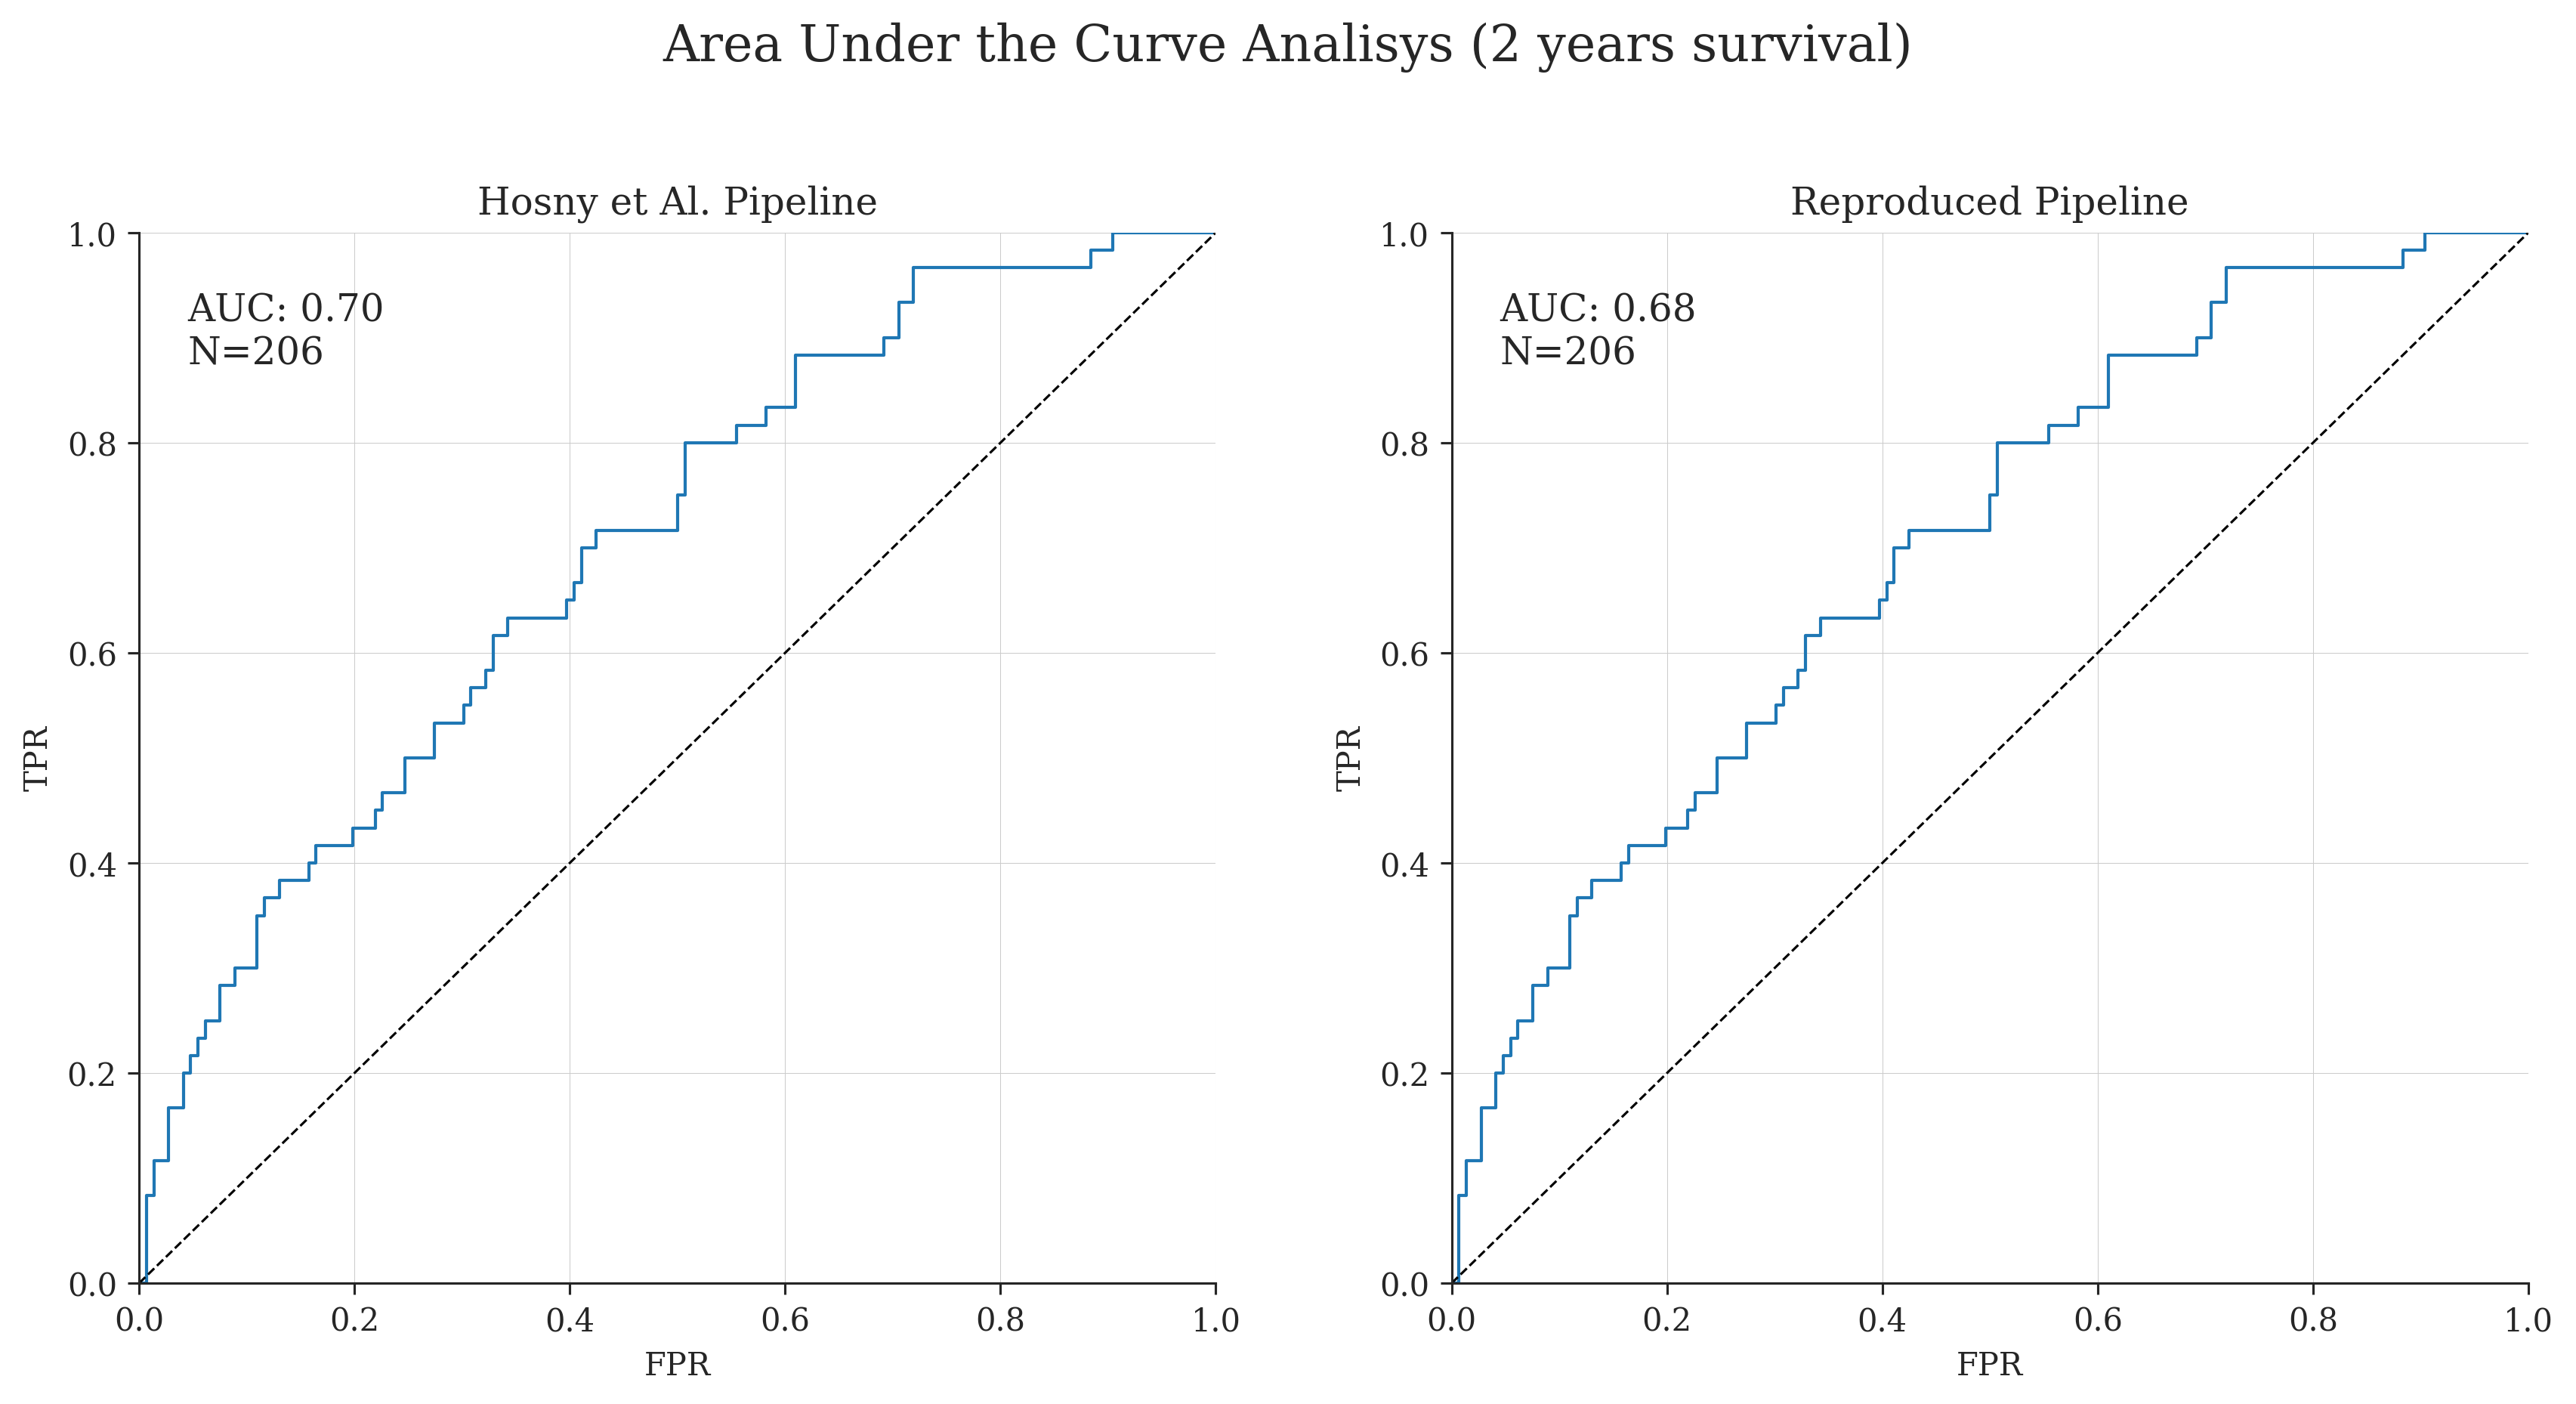

In [20]:
fig, (ax_b, ax_r) = plt.subplots(1, 2, figsize = (12, 6.75))

ax_b.plot(
    baseline["fpr"],
    baseline["tpr"],
    label = 'ROC AUC: %2.2f'%(baseline["roc_auc"]),
    lw = 1,
    )

ax_b = style_axis_auc(ax_b)
ax_b.set_title('Hosny et Al. Pipeline')
ax_b.text(
    x=0.045, y=0.875,
    s='AUC: %2.2f\nN=%g'%(baseline["roc_auc"], len(results_df)),
    fontsize=12,
    )
     
sns.despine()

## ----------------------------------------

ax_r.plot(
    baseline["fpr"],
    baseline["tpr"],
    label = 'ROC AUC: %2.2f'%(reproduction["roc_auc"]),
    lw = 1,
    )

ax_r = style_axis_auc(ax_r)
ax_r.set_title('Reproduced Pipeline')
ax_r.text(
    x=0.045, y=0.875,
    s='AUC: %2.2f\nN=%g'%(reproduction["roc_auc"], len(results_df)),
    fontsize=12,
    )

fig.suptitle("Area Under the Curve Analisys (2 years survival)", size=16, y=0.95)
fig.tight_layout(pad=3.0)
sns.despine()

# AUPRC Analisys (2 years survival)

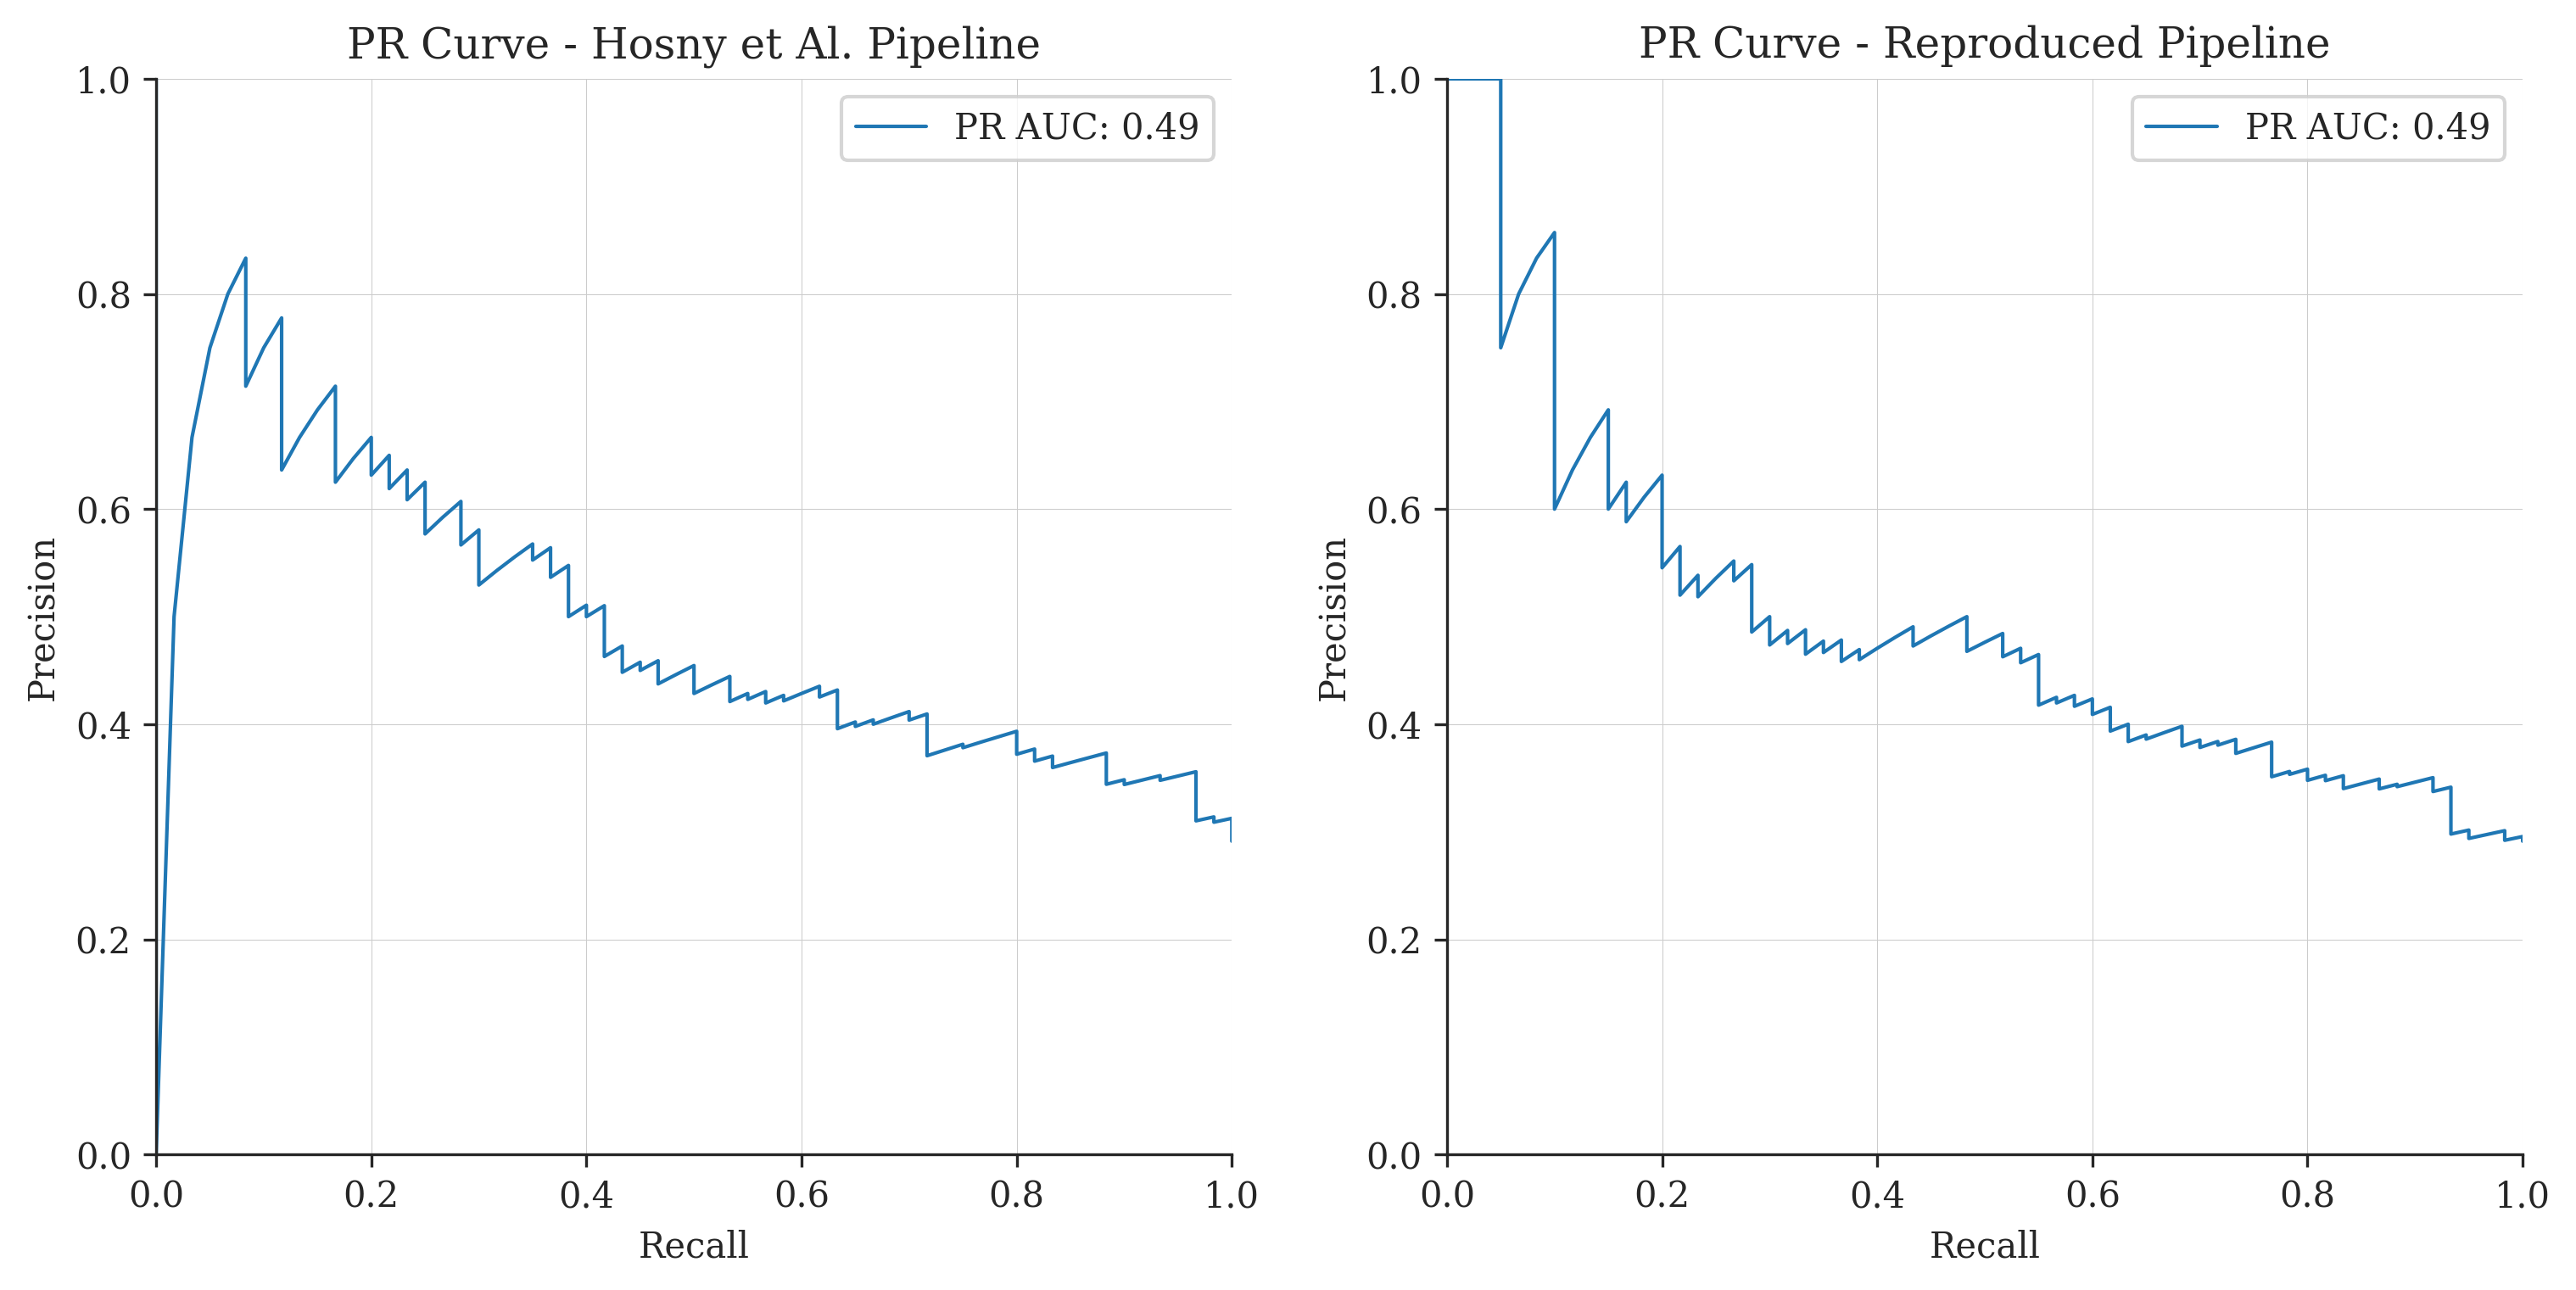

In [21]:
fig, (ax_b, ax_r) = plt.subplots(1, 2, figsize = (12, 12))

# plot PR curve
ax_b.plot(
    baseline["rec"],
    baseline["prc"],
    label = 'PR AUC: %2.2f'%(baseline["pr_auc"]),
    lw = 1,
    )

# plot operating point on PR curve
ax_b.legend(loc = 'upper right')
ax_b.set_aspect('equal', 'box')
ax_b.set_xlim([0, 1])
ax_b.set_ylim([0, 1])
ax_b.set_xlabel('Recall')
ax_b.set_ylabel('Precision')
ax_b.set_title('PR Curve - Hosny et Al. Pipeline')
ax_b.grid(linewidth = .25)

sns.despine()

## ----------------------------------------

# plot PR curve
ax_r.plot(
    reproduction["rec"],
    reproduction["prc"],
    label = 'PR AUC: %2.2f'%(reproduction["pr_auc"]),
    lw = 1,
    )

# plot operating point on PR curve
ax_r.legend(loc = 'upper right')
ax_r.set_aspect('equal', 'box')
ax_r.set_xlim([0, 1])
ax_r.set_ylim([0, 1])
ax_r.set_xlabel('Recall')
ax_r.set_ylabel('Precision')
ax_r.set_title('PR Curve - Reproduced Pipeline')
ax_r.grid(linewidth = .25)

sns.despine()

# Survival Analysis

In [42]:
results_df_baseline = results_df[["group_baseline_cat", "Survival.time", "deadstatus.event"]]

cph_baseline = CoxPHFitter()
cph_baseline.fit(
    results_df_baseline,
    duration_col='Survival.time',
    event_col='deadstatus.event'
    )

# 5-years follow-up - closer to the original analisys (results are almost identical)
"""
results_df_baseline = results_df[["group_baseline_cat", "Survival.time_5y", "deadstatus.event_5y"]]

cph_baseline = CoxPHFitter()
cph_baseline.fit(
    results_df_baseline,
    duration_col='Survival.time_5y',
    event_col='deadstatus.event_5y'
    )
"""

p_val_baseline=cph_baseline.summary["p"].values
cph_baseline.print_summary()
#cph.plot()

<lifelines.CoxPHFitter: fitted with 206 total observations, 25 right-censored observations>
             duration col = 'Survival.time_5y'
                event col = 'deadstatus.event_5y'
      baseline estimation = breslow
   number of observations = 206
number of events observed = 181
   partial log-likelihood = -828.77
         time fit was run = 2023-03-22 10:05:08 UTC

---
                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                  
group_baseline_cat   0.63       1.87       0.17             0.29             0.96                 1.34                 2.62

                     cmp to    z      p   -log2(p)
covariate                                         
group_baseline_cat     0.00 3.68 <0.005      12.05
---
Concordance = 0.56
Partial AIC = 1659.53
log-likelihood ratio test = 12.22 on 1 df
-log2(p) of ll-ratio test = 11.04

In [45]:
results_df_reproduced = results_df[["group_reproduced_cat", "Survival.time", "deadstatus.event"]]

cph_reproduced = CoxPHFitter()
cph_reproduced.fit(
    results_df_reproduced,
    duration_col='Survival.time',
    event_col='deadstatus.event'
    )

# 5-years follow-up - closer to the original analisys (results are almost identical)
"""
results_df_reproduced = results_df[["group_reproduced_cat", "Survival.time_5y", "deadstatus.event_5y"]]

cph_reproduced = CoxPHFitter()
cph_reproduced.fit(
    results_df_reproduced,
    duration_col='Survival.time_5y',
    event_col='deadstatus.event_5y'
    )
"""

p_val_reproduced=cph_reproduced.summary["p"].values
cph_reproduced.print_summary()
#cph.plot()

<lifelines.CoxPHFitter: fitted with 206 total observations, 25 right-censored observations>
             duration col = 'Survival.time_5y'
                event col = 'deadstatus.event_5y'
      baseline estimation = breslow
   number of observations = 206
number of events observed = 181
   partial log-likelihood = -832.23
         time fit was run = 2023-03-22 10:07:08 UTC

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                    
group_reproduced_cat   0.40       1.49       0.17             0.07             0.72                 1.07                 2.06

                       cmp to    z    p   -log2(p)
covariate                                         
group_reproduced_cat     0.00 2.37 0.02       5.82
---
Concordance = 0.54
Partial AIC = 1666.46
log-likelihood ratio test = 5.29 on 1 df
-log2(p) of ll-ratio test = 5.54

---

# Kaplan-Meier Analysis

In [24]:
sns.set_style("ticks")
sns.set_context(rc={"grid.linewidth": .5})

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [25]:
def style_axis_km(ax):
  ax.set_ylabel("Survival Probability")
  ax.set_xlabel("Time [years]")
  ax.set_ylim([0, 1])
  ax.set_xlim([0, 365.25*5])

  xticks = [365.25*a for a in range(0, 6)]
  xticks_labels = [a for a in range(0, 6)]
  ax.set_xticks(xticks, xticks_labels)
  ax.legend(framealpha=0)
  ax.tick_params(width = .75)

  for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(.75)

  ax.grid(linewidth = .25)
  sns.despine()
  return ax

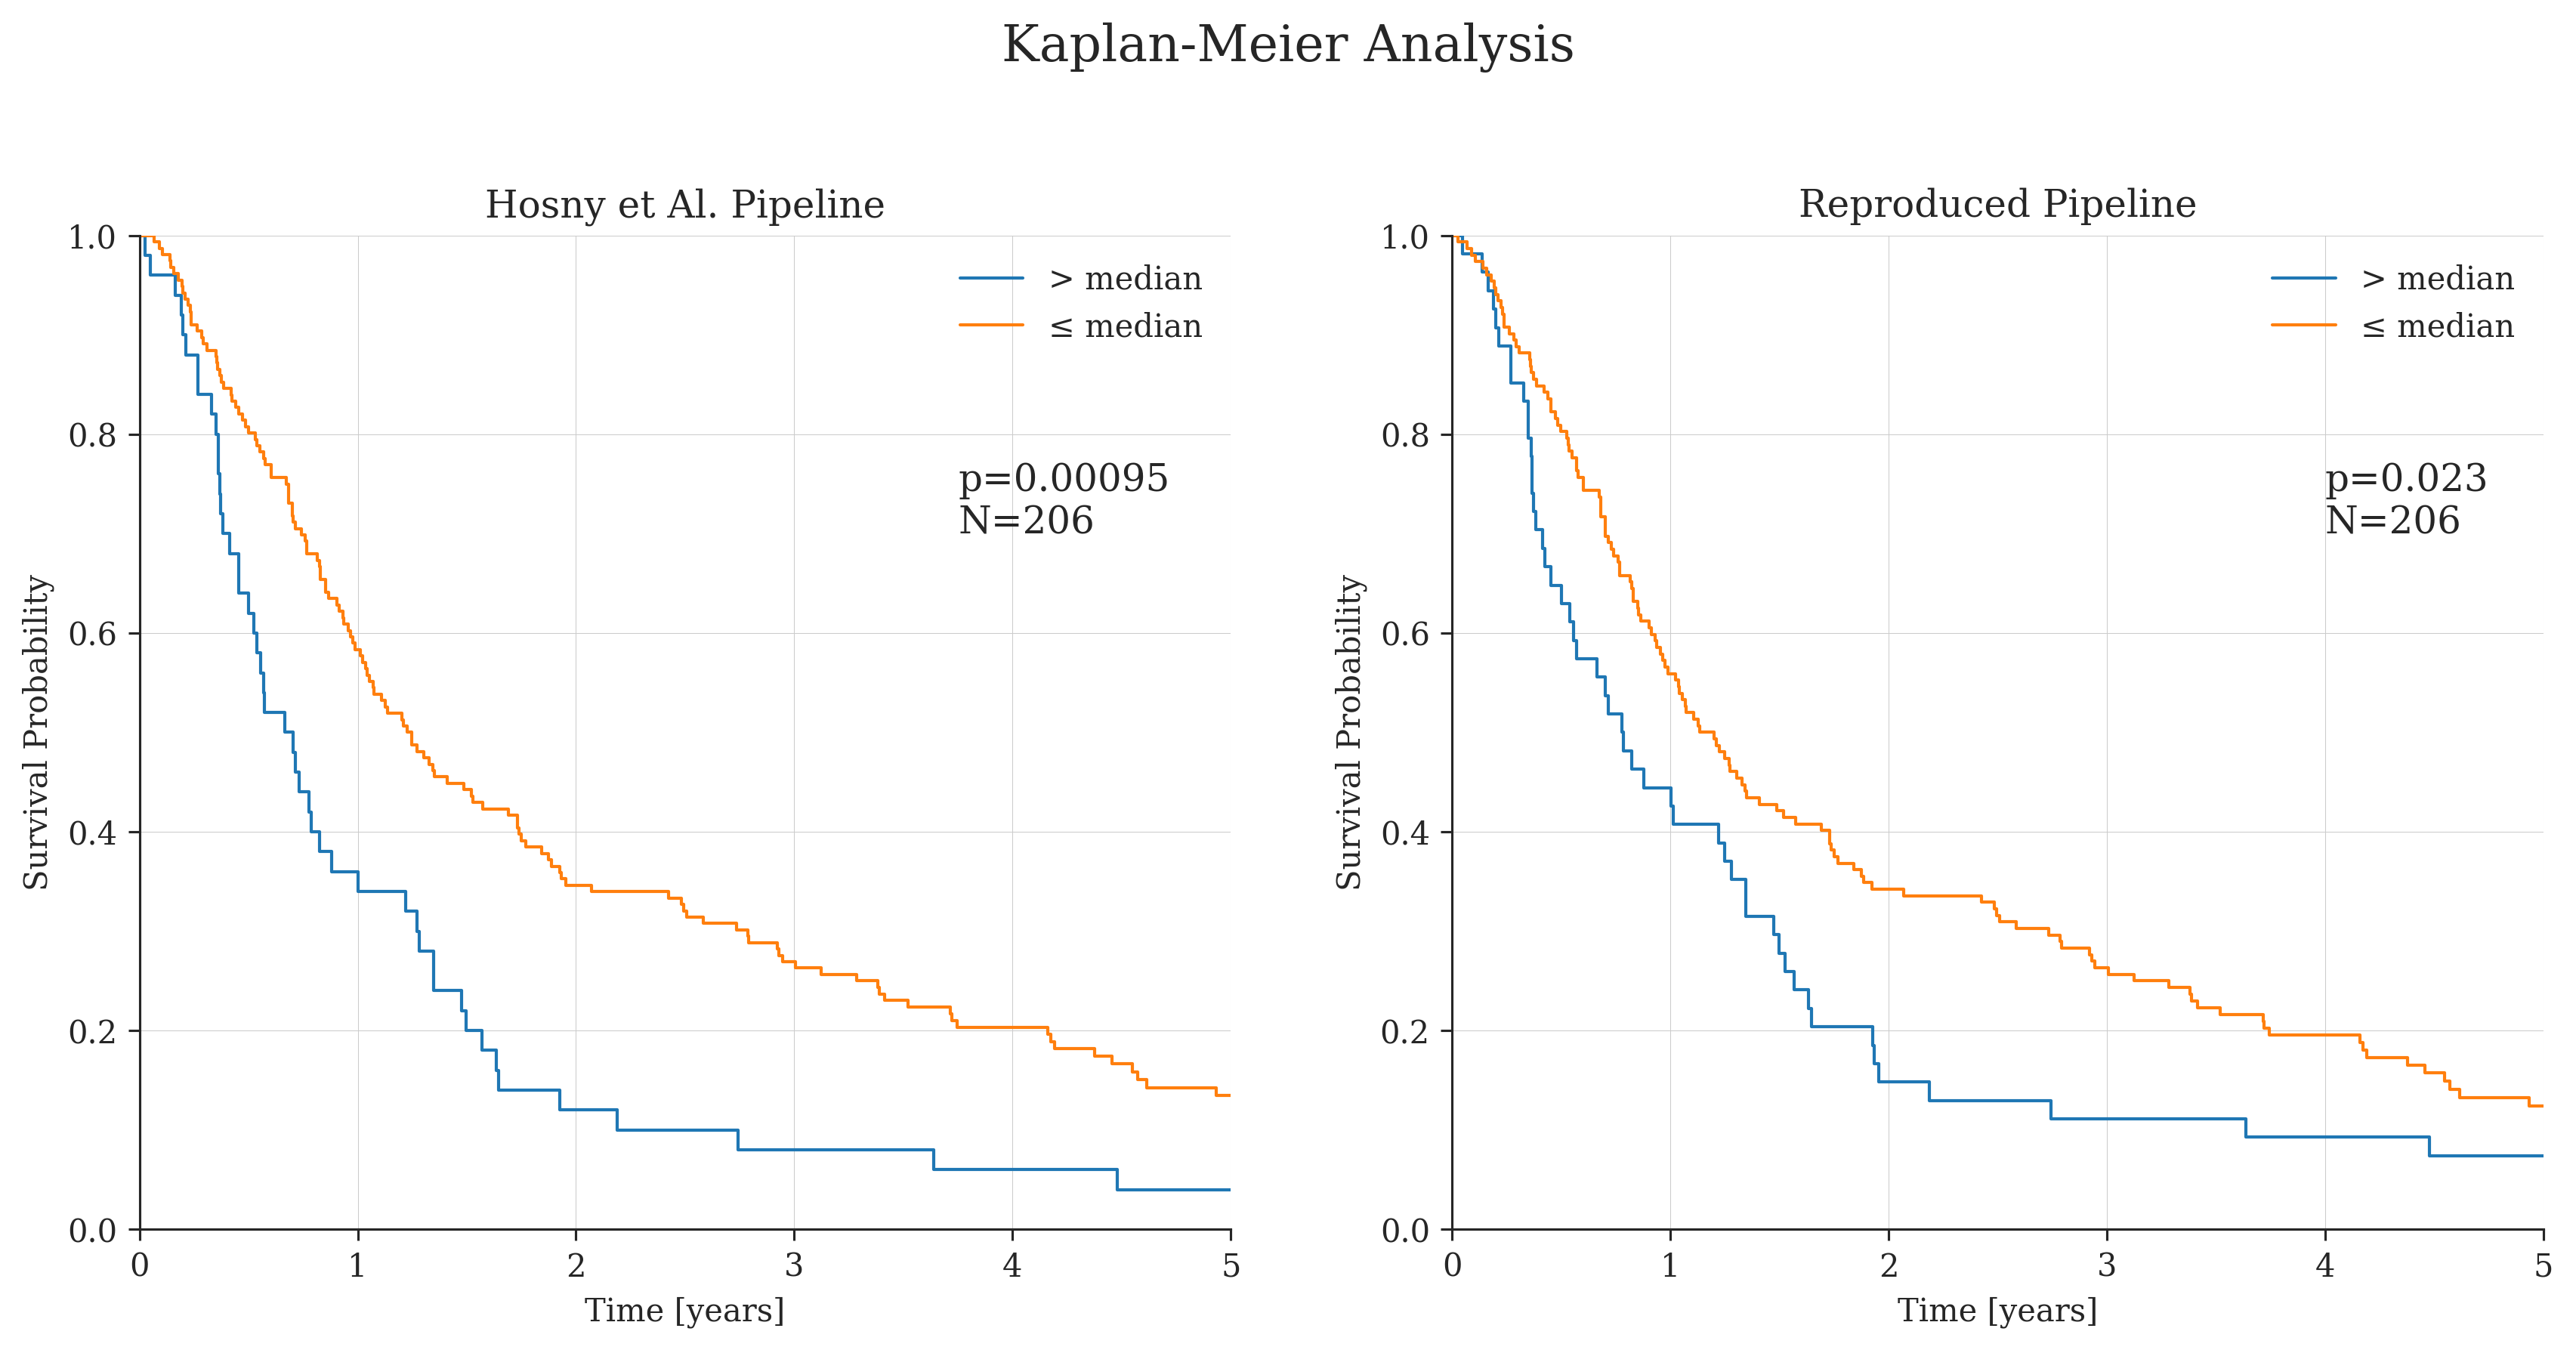

In [26]:
fig, (ax_b, ax_r) = plt.subplots(1, 2, figsize = (12, 6.5))

kmf = KaplanMeierFitter()

for name, grouped_df in results_df.groupby('group_baseline'):
    kmf.fit(
        grouped_df["Survival.time"],
        grouped_df["deadstatus.event"],
        label=name)
    
    kmf.plot_survival_function(
        ax=ax_b,
        lw=1,
        ci_alpha=0.0,
        )

ax_b = style_axis_km(ax_b)

ax_b.set_title("Hosny et Al. Pipeline")
ax_b.text(
    x=365.25*3.75, y=0.7,
    s='p=%2.5f\nN=%g'%(
        p_val_baseline,
        len(results_df)
        ),
    fontsize=12,
    )

# --------------------

kmf = KaplanMeierFitter()

for name, grouped_df in results_df.groupby('group_reproduced'):
    kmf.fit(
        grouped_df["Survival.time"],
        grouped_df["deadstatus.event"],
        label=name,
        alpha = 0.1)
    
    kmf.plot_survival_function(
        ax=ax_r,
        lw=1,
        ci_alpha=0.0,
        )

ax_r.set_title("Reproduced Pipeline")
ax_r = style_axis_km(ax_r)

ax_r.text(
    x=365.25*4, y=0.7,
    s='p=%2.3f\nN=%g'%(
        p_val_reproduced,
        len(results_df)
        ),
    fontsize=12,
    )

fig.suptitle("Kaplan-Meier Analysis", size=16, y=0.95)
fig.tight_layout(pad=3.0)
sns.despine()